In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.svm import SVR

In [3]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/UrbanComputing/Project')

Mounted at /content/drive


# Read Data

In [4]:
datapath_edge = "Dataset/London_edge_data_500m.csv"


In [5]:
datapath_node = "Dataset/London_node_data_500m.csv"

In [6]:
df_edge1 = pd.read_csv(datapath_edge)
df_node = pd.read_csv(datapath_node)

In [7]:
df_edge1.drop('Unnamed: 0',axis=1,inplace=True)
df_node.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
val = int(len(df_edge1)*0.05)
val

1153111

In [9]:
df_edge = df_edge1.copy()[:val]

In [15]:
df_edge1.shape

(23062236, 15)

In [16]:
print(', '.join(df_edge1.columns).replace('_',' '))

location 1, location 2, flows, netw distance, total loc flow, route factor, subway, bus, airbnb, speed, time, corr at destinations, corr incidence, location1 to neighbourhood, neighbourhood to location2


In [11]:
df_node.head(2)

,nodeID,airbnb_price,universities,tourism,theatres,shops,shopping_malls,restaurants,residential,pubs_cafes,...,in_total,out_total,street_density,gyration_rad,highways,metro_flow,avg_betw_centrality,in_total_spatial_lag,out_total_spatial_lag,gyration_radius_spatial_lag
0,0,1.0,0.0,0,0,0,0,0,0.0,0,...,3905,3337,10,18.554742,1,0,0.000074,4399,4034,18.671298
1,1,1.0,0.0,0,0,0,0,0,0.0,0,...,5949,5370,0,18.439816,1,0,0.000000,5585,5220,18.470922


# Preprocessing Data
Using the column total_loc_flow from edge dataset and adding ot to the nodes dataset

In [12]:
# df_edge['total_loc_flow']

In [13]:
# total_loc_flow_list = []
# for i in range(len(df_node)):
#   total_loc_flow_list.append(list(df_edge.loc[df_edge['location_1']==df_node.loc[i,'nodeID'],'total_loc_flow'])[0])
# df_node['total_loc_flow'] = total_loc_flow_list

In [14]:
# df_edge.loc[df_edge['location_1']==df_node.loc[0,'nodeID'],'total_loc_flow'][0]

In [15]:
# df_node

In [16]:
[df_edge.columns]

[Index(['location_1', 'location_2', 'flows', 'netw_distance', 'total_loc_flow',
        'route_factor', 'subway', 'bus', 'airbnb', 'speed', 'time',
        'corr_at_destinations', 'corr_incidence', 'location1_to_neighbourhood',
        'neighbourhood_to_location2'],
       dtype='object')]

In [17]:
# df_node[['in_total','out_total', 'total_loc_flow']]

In [18]:
# Set 1
X = df_edge[['netw_distance', 'total_loc_flow',
        'route_factor', 'subway', 'bus', 'airbnb', 'speed', 'time',
        'corr_at_destinations', 'corr_incidence', 'location1_to_neighbourhood',
        'neighbourhood_to_location2']]
Y = df_edge[['flows']]

In [19]:
# # Set 2
# X = df_node[['airbnb_price', 'universities', 'tourism', 'theatres',
#         'shops', 'shopping_malls', 'restaurants', 'residential', 'pubs_cafes',
#         'post', 'parking', 'offices', 'museums', 'medical', 'schools',
#         'industrial', 'government', 'fuels', 'fast_foods', 'commercial',
#         'cinemas', 'bars_cafes', 'banks', 'atms', 'arts', 'airport']]
# Y = df_node[['total_loc_flow']]

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Apply ML Models

In [21]:
# compare_df = pd.DataFrame( columns =  ['Classifier','Precision','Recall','fscore'])
# compare_df = pd.DataFrame( columns =  ['Classifier','MAE','MSE','R2','MAPE'])
classifier = []
MAE=[]
MSE = []
R2=[]
MAPE=[]

## Naive Bayesian 

In [22]:
gnbmodel = GaussianNB()
gnbmodel.fit(x_train,y_train.values.ravel())
y_pred_dt = gnbmodel.predict(x_test)
(precision, recall, fscore, support) = precision_recall_fscore_support(y_test, y_pred_dt, average='macro')
print('Precision: {}\tRecall: {}\tfscore:{}'.format(precision, recall, fscore))
# compare_df.loc[len(compare_df)]=['Naive-Bayes',precision, recall, fscore]

Precision: 0.026290283596681306	Recall: 0.03736377898644297	fscore:0.026665833358963383


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


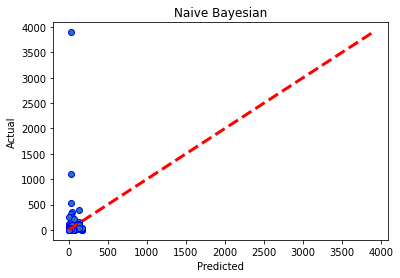

In [23]:
# compare_df
fig, ax = plt.subplots()
ax.scatter(y_pred_dt, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title("Naive Bayesian")
plt.savefig("NaiveBayes", format="PNG")
plt.show()

In [24]:
# model evaluation for testing set

mae = metrics.mean_absolute_error(y_test, y_pred_dt)
mse = metrics.mean_squared_error(y_test, y_pred_dt)
r2 = metrics.r2_score(y_test, y_pred_dt)
mape = metrics.mean_absolute_percentage_error(y_test, y_pred_dt)

classifier.append('Naive Bayes')
MAE.append(mae)
MSE.append(mse)
R2.append(r2)
MAPE.append(mape)
	

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('mape score is {}'.format(mape))

The model performance for testing set
--------------------------------------
MAE is 0.37743658474091885
MSE is 125.76129189086203
R2 score is -0.07596023742220859
mape score is 1065311341384490.6


## Logistic Regression

In [25]:
logisticRegr = LogisticRegression(max_iter=100)
logisticRegr.fit(x_train,y_train.values.ravel())
y_pred_dt = logisticRegr.predict(x_test)
(precision, recall, fscore, support) = precision_recall_fscore_support(y_test, y_pred_dt, average='macro')
print('Precision: {}\tRecall: {}\tfscore:{}'.format(precision, recall, fscore))
# compare_df.loc[len(compare_df)]=['Logistic Regression',precision, recall, fscore]

Precision: 0.02235086845157135	Recall: 0.01255361242800983	fscore:0.012181916633555594


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


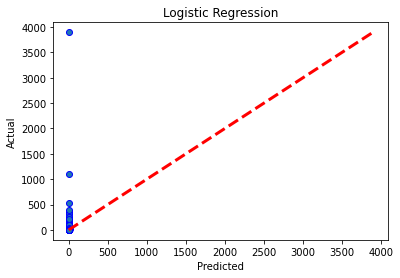

In [26]:
fig, ax = plt.subplots()
ax.scatter(y_pred_dt, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title("Logistic Regression")
# plt.savefig("LogReg", format="PNG")
plt.show()

In [27]:
# model evaluation for testing set

mae = metrics.mean_absolute_error(y_test, y_pred_dt)
mse = metrics.mean_squared_error(y_test, y_pred_dt)
r2 = metrics.r2_score(y_test, y_pred_dt)
mape = metrics.mean_absolute_percentage_error(y_test, y_pred_dt)

classifier.append('Logistic Regression')
MAE.append(mae)
MSE.append(mse)
R2.append(r2)
MAPE.append(mape)
	

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('mape score is {}'.format(mape))

The model performance for testing set
--------------------------------------
MAE is 0.16603924814895113
MSE is 116.66709370544835
R2 score is 0.001845862464503134
mape score is 28700236110066.84


## Decission Tree Classifier

In [28]:
dtmodel = DecisionTreeClassifier(random_state=0, max_depth=2)
print('Decision Tree')
dtmodel.fit(x_train,y_train.values.ravel())
y_pred_dt = dtmodel.predict(x_test)
(precision, recall, fscore, support) = precision_recall_fscore_support(y_test, y_pred_dt, average='macro')
print('Precision: {}\tRecall: {}\tfscore:{}'.format(precision, recall, fscore))
# compare_df.loc[len(compare_df)]=['Decision Tree',precision, recall, fscore]

Decision Tree
Precision: 0.018213257659312195	Recall: 0.0228903692362819	fscore:0.019932057794147955


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


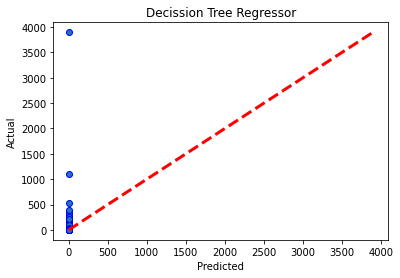

In [29]:
fig, ax = plt.subplots()
ax.scatter(y_pred_dt, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title("Decission Tree Regressor")
# plt.savefig("DTR", format="PNG")
plt.show()

In [30]:
# model evaluation for testing set

mae = metrics.mean_absolute_error(y_test, y_pred_dt)
mse = metrics.mean_squared_error(y_test, y_pred_dt)
r2 = metrics.r2_score(y_test, y_pred_dt)
mape = metrics.mean_absolute_percentage_error(y_test, y_pred_dt)

classifier.append('Decision Tree Regressor')
MAE.append(mae)
MSE.append(mse)
R2.append(r2)
MAPE.append(mape)
	

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('mape score is {}'.format(mape))

The model performance for testing set
--------------------------------------
MAE is 0.13664584031377497
MSE is 116.53417295727641
R2 score is 0.002983075971227711
mape score is 0.009382986059382328


# SVM

In [31]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x_train,y_train.values.ravel())
y_pred_dt = clf.predict(x_test)
(precision, recall, fscore, support) = precision_recall_fscore_support(y_test, y_pred_dt, average='macro')
print('Precision: {}\tRecall: {}\tfscore:{}'.format(precision, recall, fscore))
# compare_df.loc[len(compare_df)]=['SVM',precision, recall, fscore]

Precision: 0.03329163009123294	Recall: 0.03173127560296529	fscore:0.029129266132917702


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


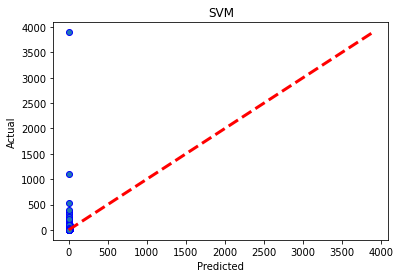

In [32]:
fig, ax = plt.subplots()
ax.scatter(y_pred_dt, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title("SVM")
# plt.savefig("SVM", format="PNG")
plt.show()

In [33]:
# model evaluation for testing set

mae = metrics.mean_absolute_error(y_test, y_pred_dt)
mse = metrics.mean_squared_error(y_test, y_pred_dt)
r2 = metrics.r2_score(y_test, y_pred_dt)
mape = metrics.mean_absolute_percentage_error(y_test, y_pred_dt)

classifier.append('SVM')
MAE.append(mae)
MSE.append(mse)
R2.append(r2)
MAPE.append(mape)
	

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('mape score is {}'.format(mape))

The model performance for testing set
--------------------------------------
MAE is 0.12302658809153083
MSE is 116.25525093455795
R2 score is 0.00536941441666039
mape score is 0.008126059397598822


## Random Forrest

In [34]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train,y_train.values.ravel())
y_pred_dt = clf.predict(x_test)
(precision, recall, fscore, support) = precision_recall_fscore_support(y_test, y_pred_dt, average='macro')
print('Precision: {}\tRecall: {}\tfscore:{}'.format(precision, recall, fscore))
# compare_df.loc[len(compare_df)]=['Random Forest',precision, recall, fscore]

Precision: 0.014988047157781069	Recall: 0.02104035599202087	fscore:0.01679141848474863


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


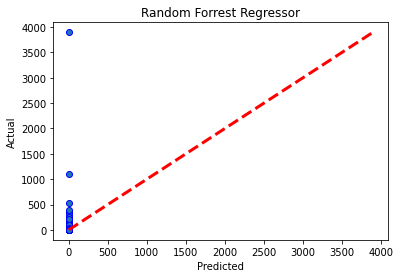

In [35]:
fig, ax = plt.subplots()
ax.scatter(y_pred_dt, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title("Random Forrest Regressor")
# plt.savefig("RandomForrest", format="PNG")
plt.show()

In [36]:
# model evaluation for testing set

mae = metrics.mean_absolute_error(y_test, y_pred_dt)
mse = metrics.mean_squared_error(y_test, y_pred_dt)
r2 = metrics.r2_score(y_test, y_pred_dt)
mape = metrics.mean_absolute_percentage_error(y_test, y_pred_dt)

classifier.append('Random Forrest Regressor')
MAE.append(mae)
MSE.append(mse)
R2.append(r2)
MAPE.append(mape)
	

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('mape score is {}'.format(mape))

The model performance for testing set
--------------------------------------
MAE is 0.14261124360263056
MSE is 116.65111588518569
R2 score is 0.0019825619133145844
mape score is 0.010549136166510435


In [37]:
df = pd.DataFrame({'Classifier':classifier,
                  'MAE':MAE,
                   'MSE':MSE,
                   'R2':R2,
                   'MAPE':MAPE})

In [38]:
df.iloc[:,1:]=df.iloc[:,1:].apply(lambda x : round(x,4) )

In [39]:
df

,Classifier,MAE,MSE,R2,MAPE
0,Naive Bayes,0.3774,125.7613,-0.0760,1.065311e+15
1,Logistic Regression,0.1660,116.6671,0.0018,2.870024e+13
2,Decision Tree Regressor,0.1366,116.5342,0.0030,9.400000e-03
3,SVM,0.1230,116.2553,0.0054,8.100000e-03
4,Random Forrest Regressor,0.1426,116.6511,0.0020,1.050000e-02
